In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

from galileo_funcs import format_data, plot_mag, plot_distance, plot_traj

/Users/nathan/Documents/Code/GaPT/galileo_funcs.py:18: SyntaxWarning: invalid escape sequence '\s'
  orbit_data = pd.read_csv(orbit_path, sep='\s+', names=header)
/Users/nathan/Documents/Code/GaPT/galileo_funcs.py:137: SyntaxWarning: invalid escape sequence '\l'
  flow_label = '$\longrightarrow$'
/Users/nathan/Documents/Code/GaPT/galileo_funcs.py:139: SyntaxWarning: invalid escape sequence '\o'
  flow_label = '$\odot$'


In [2]:
orbits_io = []
for orb_num in ('00', '24', '27', '31', '32'):

    orb_path = f'data/io/ORB{orb_num}_IO_IPHIO.TAB'
    orb_data = format_data(orb_path, 'Io')

    orb_data["number"] = orb_num

    orbits_io.append(orb_data)

orb00_io, orb24_io, orb27_io, orb31_io, orb32_io = orbits_io

orbits_gan = []
for orb_num in ('01', '02', '07', '08', '09', '12', '28', '29'):

    orb_path = f'data/ganymede/ORB{orb_num}_GAN_GPHIO.TAB'
    orb_data = format_data(orb_path, 'Ganymede')

    orb_data["number"] = orb_num

    orbits_gan.append(orb_data)

orb00_gan, orb02_gan, orb07_gan, orb08_gan, orb09_gan, orb12_gan, orb28_gan, orb29_gan = orbits_gan

orbits_call = []
for orb_num in ('03', '09', '10', '21', '22', '23', '30'):

    orb_path = f'data/callisto/ORB{orb_num}_CALL_CPHIO.TAB'
    orb_data = format_data(orb_path, 'Callisto')

    orb_data["number"] = orb_num

    orbits_call.append(orb_data)

orb03_call, orb09_call, orb10_call, orb21_call, orb22_call, orb23_call, orb30_call = orbits_call

orbits_eur = []
for orb_num in ('04', '11', '12', '14', '15', '17', '19', '25', '26'):

    orb_path = f'data/europa/ORB{orb_num}_EUR_EPHIO.TAB'
    orb_data = format_data(orb_path, 'Europa')

    orb_data["number"] = orb_num

    orbits_eur.append(orb_data)

orb04_eur, orb11_eur, orb12_eur, orb14_eur, orb15_eur, orb17_eur, orb19_eur, orb25_eur, orb26_eur = orbits_eur

# Select orbit here

In [3]:
orbit_data = orb04_eur

<Axes: xlabel='UTC', ylabel='Distance [$R_{EUR}$]'>

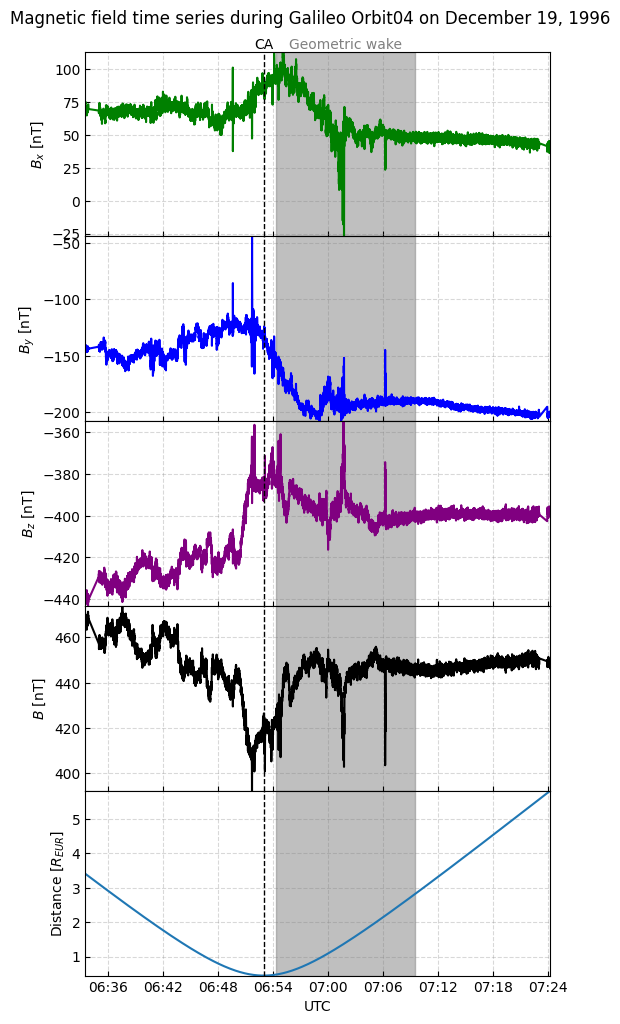

In [4]:
fig = plt.figure(figsize=(6,12), dpi=100)
fig.suptitle(f'Magnetic field time series during Galileo Orbit{orbit_data['number'][0]} on {orbit_data['start date'][0]}', ha='center',va='bottom', y=0.9)
gs = fig.add_gridspec(5, 1, height_ratios=[1, 1, 1, 1, 1], width_ratios=[1], hspace=0)

plot_mag(orbit_data, fig, gs, 0, 'B_x', 'green')
plot_mag(orbit_data, fig, gs, 1, 'B_y', 'blue')
plot_mag(orbit_data, fig, gs, 2, 'B_z', 'purple')
plot_mag(orbit_data, fig, gs, 3, 'B', 'black')
# Distance to surface
plot_distance(orbit_data, fig, gs, 4)

<Axes: xlabel='X [$R_{EUR}$]', ylabel='Z [$R_{EUR}$]'>

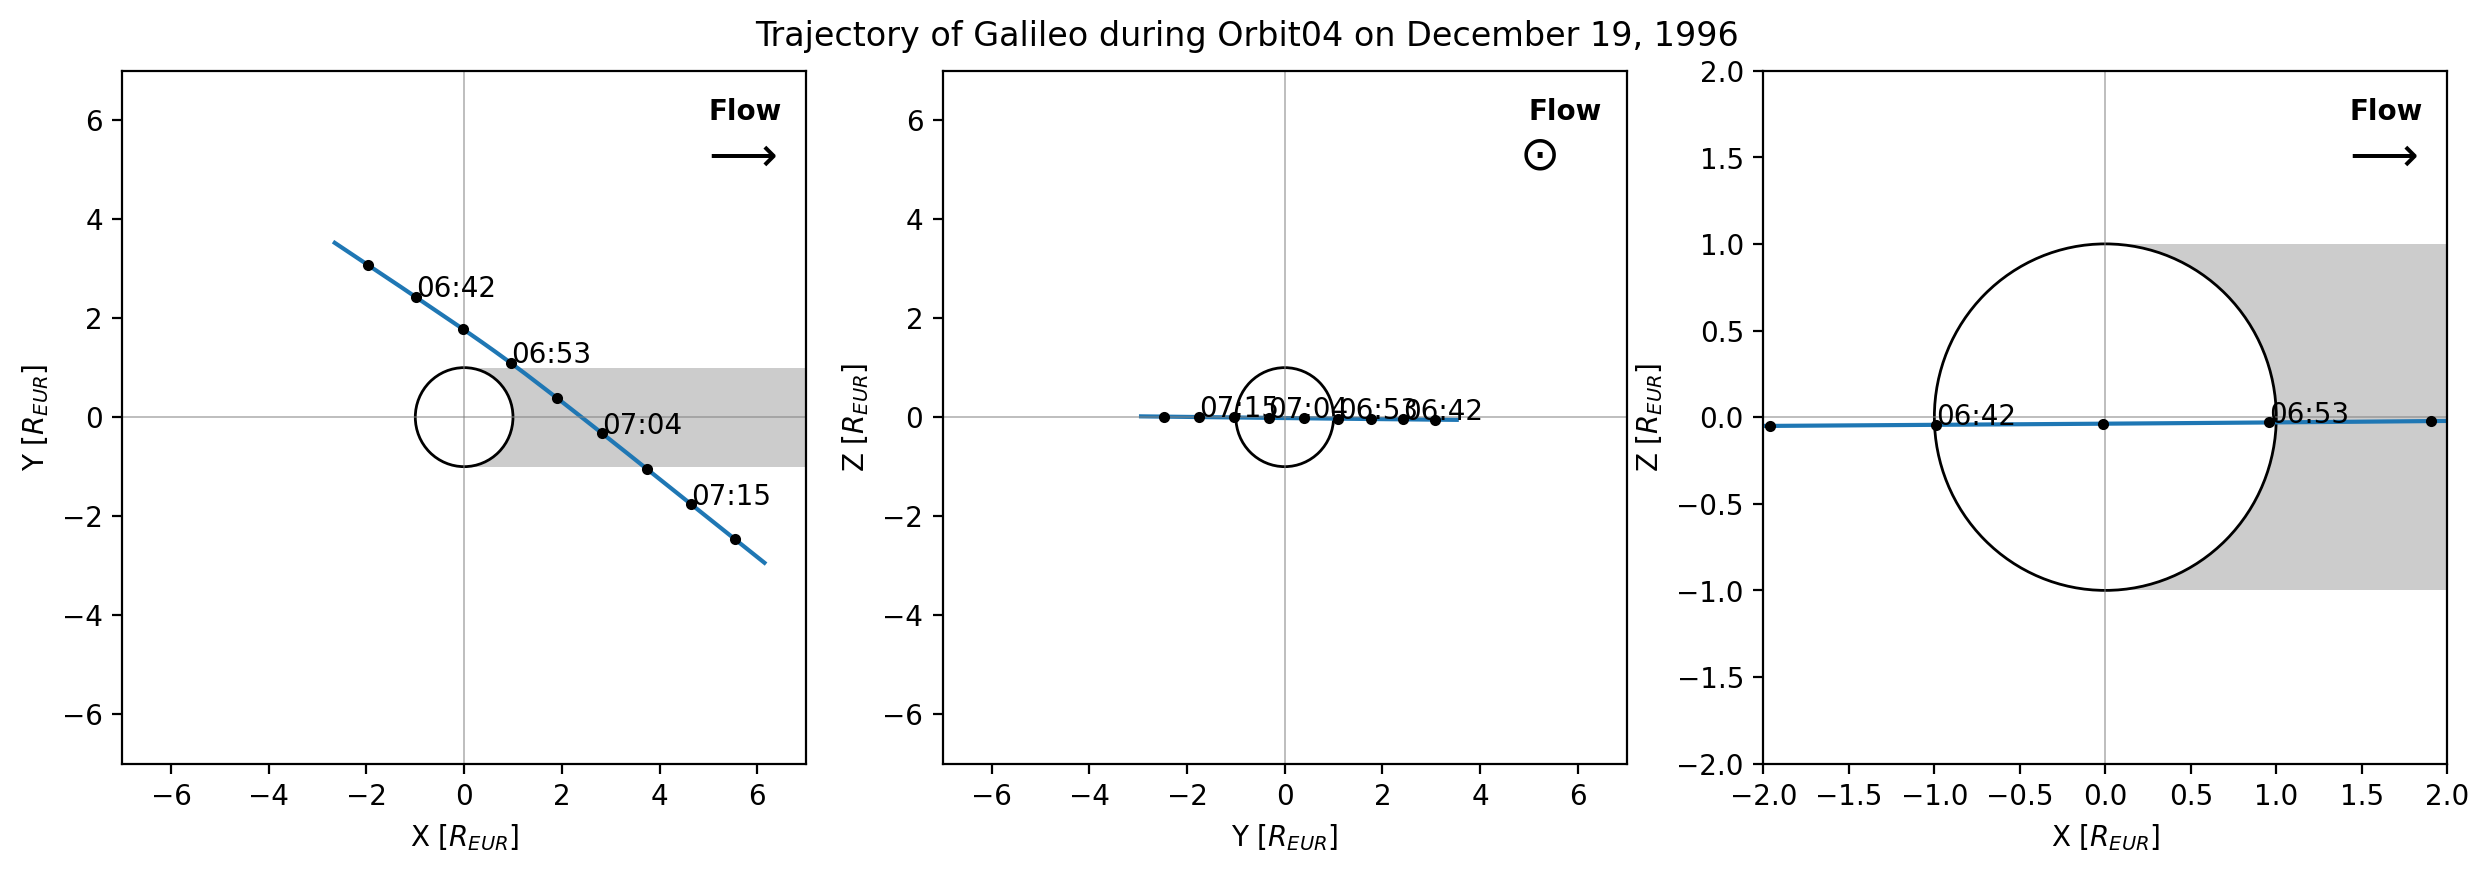

In [5]:
fig = plt.figure(figsize=(15,4.5), dpi=200)
fig.suptitle(f'Trajectory of Galileo during Orbit{orbit_data['number'][0]} on {orbit_data['start date'][0]}', ha='center',va='bottom', y=0.9)
gs = fig.add_gridspec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1], wspace=0.2)

plot_traj(orbit_data, fig, gs, 0, 'XY', flowdir='right', date_offsets=[0,0])
plot_traj(orbit_data, fig, gs, 1, 'YZ', flowdir='out', date_offsets=[0,0])
plot_traj(orbit_data, fig, gs, 2, 'XZ', flowdir='right', date_offsets=[0,0], lim=2)

# To fix:
### General

### Magnetic field
- Add spacecraft coords under timestamps

### Trajectory
- Create a default limits value w.r.t. data